In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

In [138]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/cluster_hw.csv')

In [139]:
data

,Unnamed: 0,feat1,feat2,Class
0,0,1.126107,-0.363169,0
1,1,0.380427,0.381545,1
2,2,-0.095709,-0.350235,1
3,3,1.182031,0.046286,0
4,4,-0.657046,1.106598,0
...,...,...,...,...
1495,1495,-1.056678,-0.782838,0
1496,1496,-1.117567,0.615330,0
1497,1497,-0.657347,-1.055618,0
1498,1498,-0.586562,-1.022173,0


In [140]:
len(data)==((data['Unnamed: 0']==data.index)).sum()

True

In [141]:
#Therefore it is safe to delete Unnamed:0
del data['Unnamed: 0']

In [142]:
data

,feat1,feat2,Class
0,1.126107,-0.363169,0
1,0.380427,0.381545,1
2,-0.095709,-0.350235,1
3,1.182031,0.046286,0
4,-0.657046,1.106598,0
...,...,...,...
1495,-1.056678,-0.782838,0
1496,-1.117567,0.615330,0
1497,-0.657347,-1.055618,0
1498,-0.586562,-1.022173,0


1. Fit a logistic regression classifier. How accurate is your model at predicting the correct class? Is the model underfitting or overfitting the data? Explain.


In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
X=data[['feat1','feat2']]
y=data['Class']

In [145]:
clf = LogisticRegression(random_state=2020)

In [146]:
LRclf = clf.fit(X[['feat1','feat2']], y)

In [147]:
LRclf.coef_

array([[0.03708835, 0.02119224]])

In [148]:
LRclf.intercept_

array([0.00053095])

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [151]:
reglrmod=LogisticRegression(random_state=2020).fit(X_train[['feat1','feat2']],y_train)

In [152]:
lrcm=pd.crosstab(LRclf.predict(X_test[['feat1','feat2']]),y_test)
lrcm

Class,0,1
row_0,,
0,119,116
1,110,105


In [153]:
(119+105)/(119+105+116+110)

0.49777777777777776

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
accuracy_score(LRclf.predict(X_test[['feat1','feat2']]),y_test)

0.49777777777777776

In [156]:
accuracy_score(LRclf.predict(X_train[['feat1','feat2']]),y_train)

0.5019047619047619

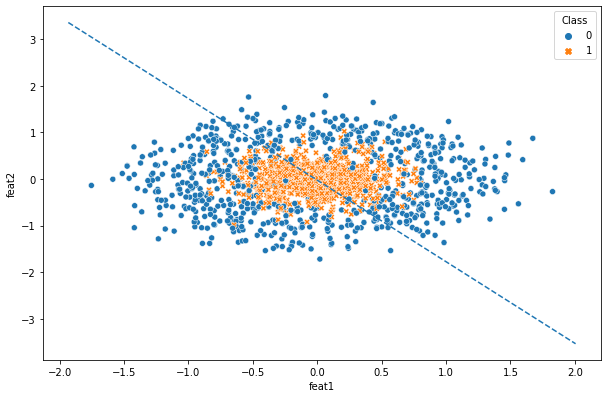

In [157]:
b=LRclf.intercept_
b1,b2=LRclf.coef_[0]

f, ax = plt.subplots(figsize=(10, 6.5))
sns.scatterplot(x="feat1", y="feat2",
                hue="Class", style="Class",
                data=data, ax=ax)
x_vals = np.array(ax.get_xlim())
y_vals = -b/b2 - (b1/b2) * x_vals
# b+b1x+b2y = log(odds). When prob(class = 1) is 0.5, we have log(odds)=0. 
#Now solve for y in terms of x to get the decision boundary which is the linear equation above. 
plt.plot(x_vals, y_vals, '--')
plt.show()

In [158]:
print(accuracy_score(LRclf.predict(X_test[['feat1','feat2']]),y_test))
print(accuracy_score(LRclf.predict(X_train[['feat1','feat2']]),y_train))

0.49777777777777776
0.5019047619047619


The model is performing better on training data as compared to the testing data and therfore it is underfitting the data.

2. Use cross validation to fit logistic regression models whose decision boundaries are polynomial, with degrees 1,2,3,4, and 5. Which model would you choose based on the cross validation scores (i.e., the average model accuracy over the 5 folds)?

In [159]:
X['f12']=X['feat1']**2 
X['f22']=X['feat2']**2
X['f13']=X['feat1']**3
X['f23']=X['feat2']**3
X['f14']=X['feat1']**4
X['f24']=X['feat2']**4
X['f15']=X['feat1']**5
X['f25']=X['feat2']**5

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [161]:
from sklearn.model_selection import cross_validate

In [162]:
lcv1_results = cross_validate(clf, X_train[['feat1','feat2']], y_train, cv=5,scoring='accuracy')
lcv2_results = cross_validate(clf, X_train[['feat1','feat2','f12','f22']], y_train, cv=5,scoring='accuracy')
lcv3_results = cross_validate(clf, X_train[['feat1','feat2','f12','f22','f13','f23']], y_train, cv=5,scoring='accuracy')
lcv4_results = cross_validate(clf, X_train[['feat1','feat2','f12','f22','f13','f23','f14','f24']], y_train, cv=5,scoring='accuracy')
lcv5_results = cross_validate(clf, X_train[['feat1','feat2','f12','f22','f13','f23','f14','f24','f15','f25']], y_train, cv=5,scoring='accuracy')

In [163]:
lcv1_results['test_score'].round(2)

array([0.64, 0.63, 0.61, 0.64, 0.59])

In [164]:
lcv2_results['test_score'].round(2)

array([0.86, 0.91, 0.83, 0.89, 0.86])

In [165]:
lcv3_results['test_score'].round(2)

array([0.86, 0.91, 0.83, 0.89, 0.86])

In [166]:
lcv4_results['test_score'].round(2)

array([0.86, 0.91, 0.84, 0.88, 0.85])

In [167]:
lcv5_results['test_score'].round(2)

array([0.86, 0.91, 0.84, 0.88, 0.85])

In [168]:
print(lcv1_results['test_score'].mean().round(2),lcv2_results['test_score'].mean().round(2),lcv3_results['test_score'].mean().round(2),lcv4_results['test_score'].mean().round(2),lcv5_results['test_score'].mean().round(2))

0.62 0.87 0.87 0.87 0.87


In [169]:
deg2mod=LogisticRegression(random_state=0).fit(X_train[['feat1','feat2','f12','f22']],y_train)

In [170]:
reglrmod=LogisticRegression(random_state=0).fit(X_train[['feat1','feat2']],y_train)

In [171]:
reglrmod.coef_

array([[ 0.11192914, -0.02625497]])

In [172]:
deg2mod.coef_

array([[ 0.10523028,  0.03354787, -5.40097052, -5.24394253]])

In [173]:
pd.crosstab(LRclf.predict(X_test[['feat1','feat2']]),y_test)

Class,0,1
row_0,,
0,117,103
1,122,108


In [174]:
accuracy_score(LRclf.predict(X_test[['feat1','feat2']]),y_test)

0.5

In [175]:
pd.crosstab(deg2mod.predict(X_test[['feat1','feat2','f12','f22']]),y_test)

Class,0,1
row_0,,
0,202,12
1,37,199


In [176]:
accuracy_score(deg2mod.predict(X_test[['feat1','feat2','f12','f22']]),y_test)

0.8911111111111111

In [177]:
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1.5, 2, 500))
x2=xx**2
y2=yy**2
X_grid = np.c_[xx.ravel(), yy.ravel(),x2.ravel(),y2.ravel()]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


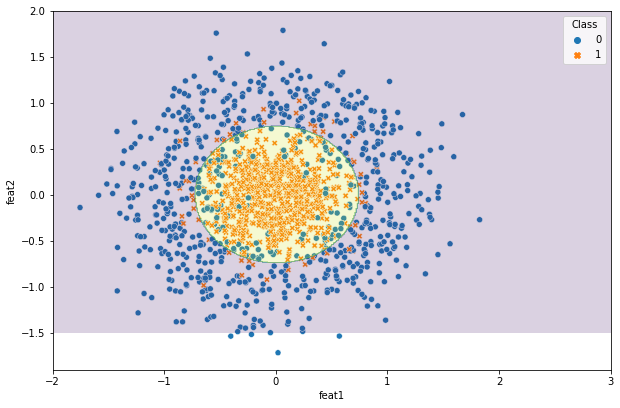

In [178]:
zz_lr3 = deg2mod.predict_proba(X_grid)[:,1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(10, 6.6))
sns.scatterplot(x='feat1',y='feat2',hue='Class',style='Class',data=data)
plt.contourf(xx, yy, zz_lr3 > 0.5, alpha=0.2)
plt.show()

I chose the degree two model because the mean score of all the models were the same after the degree two model.

3. Do you think your classifier could be significantly improved by a more flexible method? Why or why not?

No, I don't think the classifier could be improved by using a more flexible method because a flexible method means adding variables with higher power in the regression. When we take the mean of the 5 folds of cross validation model we see that the mean after the quadratic remains same up untill lcv5. Therefore we might have to add a variable with a higher power and that will inturn lead to overfitting and have a higher variance and lower bias.
